<a href="https://colab.research.google.com/github/nandinisitlani2/Tensorflow-Essentials/blob/main/IntroToNLP_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-05-21 07:59:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-05-21 07:59:04 (97.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
from helper_functions import unzip_data,plot_loss_curves,create_tensorboard_callback,compare_historys

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
# this data set is from the below kaggle competition
#https://www.kaggle.com/competitions/nlp-getting-started

--2023-05-21 07:59:07--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 172.253.118.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K   933KB/s    in 0.6s    

2023-05-21 07:59:08 (933 KB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [4]:
unzip_data("nlp_getting_started.zip")

In [5]:
import pandas as pd

train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [6]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
train_data_shuffle=train_df.sample(frac=1,random_state=42)

In [8]:
train_data_shuffle.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [9]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [10]:
import random
random_no=random.randint(0,len(train_df)-5)
for row in train_data_shuffle[["text","target"]][random_no:random_no+5].itertuples():
 _,text,target=row
 print(f"target:{target}","(real_disaster)"if target>0 else "(not_disaster)")
 print(f"text :\n{text}\n")
 print(f"-----\n")

target:0 (not_disaster)
text :
Drake is really body bagging meek

-----

target:0 (not_disaster)
text :
Ignition Knock (Detonation) Sensor-Senso Standard fits 03-08 Mazda 6 3.0L-V6 http://t.co/c8UXkIzwM6 http://t.co/SNxgH9R16u

-----

target:0 (not_disaster)
text :
she's a natural disaster she's the last of the American girls ??

-----

target:1 (real_disaster)
text :
... The pain of those seconds must have been awful as her heart burst and her lungs collapsed and there was no air and...

-----

target:0 (not_disaster)
text :
@thomasvissman22 @KeithyyL Keithyy gettin burned outta the blocks and on social media.... http://t.co/dlkuFtLQnF

-----



In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_sentences,val_sentences,train_labels,val_labels=train_test_split(train_data_shuffle.text.to_numpy(),
                                                                        train_data_shuffle.target.to_numpy(),
                                                                        test_size=0.2,
                                                                        random_state=42)

In [13]:
len(train_sentences),len(train_labels),len(val_sentences),len(val_labels)

(6090, 6090, 1523, 1523)

In [14]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [15]:
text_vectorizer=TextVectorization(max_tokens=None,
                                  standardize="lower_and_strip_punctuation",
                                  split="whitespace",
                                  ngrams=None,
                                  output_mode="int",
                                  output_sequence_length=None,
                                  )

In [16]:
max_vocab_length=10000
max_lenght=15

text_vectorizer=TextVectorization(max_tokens=max_vocab_length,
                                  output_mode="int",
                                  output_sequence_length=max_lenght)

In [17]:
text_vectorizer.adapt(train_sentences)

sample_sentence="this is a sample sentence"

text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  19,    9,    3, 8148,    1,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [18]:
random_sentence=random.choice(train_sentences)
print(random_sentence)
text_vectorizer([random_sentence])

Trauma Team needs to come to the American E-shop.


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[387, 618, 805,   5, 206,   5,   2, 752,   1,   0,   0,   0,   0,
          0,   0]])>

In [19]:
words_in_vocab=text_vectorizer.get_vocabulary()
top_5_words=words_in_vocab[:5]
least_5_words=words_in_vocab[-5:]

print(f"most used words:{top_5_words}")
print(f"least used words:{least_5_words}")

most used words:['', '[UNK]', 'the', 'a', 'in']
least used words:['minded', 'mindblowing', 'milne', 'milledgeville', 'millcityio']


In [20]:
from tensorflow.keras import layers

embedding=layers.Embedding(input_dim=max_vocab_length,
                           output_dim=128,
                           input_length=max_lenght)


embedding

In [21]:
random_sentence=random.choice(train_sentences)

embedded_sentence=embedding(text_vectorizer([random_sentence]))

embedded_sentence

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.00414339, -0.02096332,  0.02110659, ...,  0.04845014,
         -0.03800894,  0.04351938],
        [ 0.00456406, -0.03256806,  0.00085106, ..., -0.04518208,
          0.03531296,  0.02554538],
        [-0.04343707,  0.02452208,  0.01755783, ...,  0.02450157,
         -0.0111962 , -0.01889091],
        ...,
        [-0.0213907 ,  0.02561481, -0.02843449, ...,  0.00098001,
          0.00373869,  0.00618513],
        [-0.0213907 ,  0.02561481, -0.02843449, ...,  0.00098001,
          0.00373869,  0.00618513],
        [-0.0213907 ,  0.02561481, -0.02843449, ...,  0.00098001,
          0.00373869,  0.00618513]]], dtype=float32)>

## Model 0

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0=Pipeline([
                ("tfidf",TfidfVectorizer()),
                ("clf",MultinomialNB())
    
    
])

model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [23]:
baseline_score=model_0.score(val_sentences,val_labels)

print(f"our baseline model achives an accuracy of :{baseline_score*100:.2f}%")

our baseline model achives an accuracy of :79.91%


In [24]:
pred_labels=model_0.predict(val_sentences)

In [25]:
from sklearn.metrics import accuracy_score , precision_recall_fscore_support

def calculate_results(y_true,y_pred):
  accuracy=accuracy_score(y_true,y_pred)

  precision, recall, fscore,_=precision_recall_fscore_support(y_true,y_pred,average="weighted")

  model_results={"accuracy":accuracy,
                 "precision":precision,
                 "recall":recall,
                 "fscore":fscore      
  }
  return model_results

In [97]:
baseline_results=calculate_results(y_true=val_labels,
                  y_pred=pred_labels)

## Model 1-simple  dense model

In [27]:
from helper_functions import create_tensorboard_callback
DIR="model_logs"

In [28]:
from tensorflow.keras import layers

inputs= layers.Input(shape=(1,),dtype=tf.string)
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(1,activation="sigmoid")(x)

model_1=tf.keras.Model(inputs,outputs)


In [29]:
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer="adam",
                metrics=["accuracy"])

In [30]:
model_1_history=model_1.fit(x=train_sentences,
                            y=train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(dir_name=DIR,
                                                                   experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20230521-075913
Epoch 1/5
191/191 [==============================] - 35s 157ms/step - loss: 0.6222 - accuracy: 0.6859 - val_loss: 0.5501 - val_accuracy: 0.7485
Epoch 2/5
191/191 [==============================] - 5s 26ms/step - loss: 0.4530 - accuracy: 0.8133 - val_loss: 0.4773 - val_accuracy: 0.7820
Epoch 3/5
191/191 [==============================] - 6s 34ms/step - loss: 0.3519 - accuracy: 0.8609 - val_loss: 0.4603 - val_accuracy: 0.7879
Epoch 4/5
191/191 [==============================] - 3s 15ms/step - loss: 0.2862 - accuracy: 0.8892 - val_loss: 0.4643 - val_accuracy: 0.7984
Epoch 5/5
191/191 [==============================] - 4s 19ms/step - loss: 0.2366 - accuracy: 0.9136 - val_loss: 0.4753 - val_accuracy: 0.7945


In [31]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-train

In [96]:
model_1.evaluate(val_sentences,val_labels)

48/48 [==============================] - 0s 3ms/step - loss: 0.5410 - accuracy: 0.7676


[0.5410135388374329, 0.7675639986991882]

In [33]:
model_1_pred_probs=model_1.predict(val_sentences)

48/48 [==============================] - 0s 2ms/step


In [34]:
model_1_preds=tf.squeeze(tf.round(model_1_pred_probs))

In [98]:
model_1_results=calculate_results(val_labels,model_1_preds)

In [36]:
words_in_vocab[:10]

['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']

In [37]:
embedd_weights=model_1.get_layer("embedding").get_weights()[0]

In [38]:
embedd_weights

array([[-0.00573256,  0.0133909 , -0.04483252, ...,  0.01396435,
        -0.01202734,  0.02142099],
       [ 0.01481934, -0.02928244,  0.01019026, ...,  0.05686432,
        -0.04833583,  0.05377052],
       [ 0.01470969, -0.04992781, -0.05508301, ..., -0.01104278,
         0.03243119, -0.00748825],
       ...,
       [ 0.02807898, -0.09192429, -0.0019004 , ...,  0.03163408,
         0.00366883,  0.03490752],
       [-0.02424727,  0.00462595,  0.02196672, ..., -0.00433816,
         0.03372973, -0.05732368],
       [-0.04085723,  0.09747448,  0.01332488, ..., -0.06631212,
         0.09180234, -0.06270301]], dtype=float32)

In [39]:
embedd_weights.shape

(10000, 128)

In [40]:
#import io
#out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
#out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

#for index, word in enumerate(words_in_vocab):
 # if index == 0:
  #  continue  # skip 0, it's padding.
  #vec = embedd_weights[index]
  #out_v.write('\t'.join([str(x) for x in vec]) + "\n")
 # out_m.write(word + "\n")

#out_v.close()
#out_m.close()

In [41]:
#*try:
  #from google.colab import files
 #files.download('vectors.tsv')
 # files.download('metadata.tsv')
#except Exception:
 # pass

In [42]:
from tensorflow.keras import layers

inputs=layers.Input((1,),dtype="string")
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.LSTM(64,return_sequences=True)(x)# since we are stacking RNN layers we need to set return sequences = true
x=layers.LSTM(64)(x)

x=layers.Dense(1,activation="relu")(x)
outputs=layers.Dense(1,activation="sigmoid")(x)

model_2=tf.keras.Model(inputs,outputs)

In [43]:
model_2.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [44]:
history_2=model_2.fit(x=train_sentences,
                      y=train_labels,
                      epochs=5,
                      validation_data=(val_sentences,val_labels),
                      callbacks=[create_tensorboard_callback(dir_name=DIR,
                                                             experiment_name="model_2")])

Saving TensorBoard log files to: model_logs/model_2/20230521-080037
Epoch 1/5
191/191 [==============================] - 20s 78ms/step - loss: 0.4656 - accuracy: 0.9256 - val_loss: 0.5823 - val_accuracy: 0.7859
Epoch 2/5
191/191 [==============================] - 3s 15ms/step - loss: 0.3920 - accuracy: 0.9440 - val_loss: 0.6462 - val_accuracy: 0.7761
Epoch 3/5
191/191 [==============================] - 4s 21ms/step - loss: 0.3419 - accuracy: 0.9517 - val_loss: 0.6235 - val_accuracy: 0.7846
Epoch 4/5
191/191 [==============================] - 2s 11ms/step - loss: 0.3049 - accuracy: 0.9547 - val_loss: 0.7061 - val_accuracy: 0.7787
Epoch 5/5
191/191 [==============================] - 2s 13ms/step - loss: 0.2722 - accuracy: 0.9583 - val_loss: 0.7792 - val_accuracy: 0.7781


In [45]:
model_2_pred_probs=model_2.predict(val_sentences)

48/48 [==============================] - 1s 4ms/step


In [46]:
model_2_preds=tf.squeeze(tf.round(model_2_pred_probs))

In [99]:
model_2_results=calculate_results(y_true=val_labels,
                  y_pred=model_2_preds)

In [48]:
inputs=layers.Input((1,),dtype="string")
x=text_vectorizer(inputs)
x=embedding(x)

x=layers.GRU(64,return_sequences=True)(x)# since we are stacking RNN layers we need to set return sequences = true

x=layers.GlobalAveragePooling1D()(x)
x=layers.Dense(1,activation="relu")(x)
outputs=layers.Dense(1,activation="sigmoid")(x)

model_3=tf.keras.Model(inputs,outputs)

In [49]:
model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_3 (Dense)             (None, 1)                 65  

In [50]:
model_3.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [51]:
history_3=model_3.fit(x=train_sentences,
                      y=train_labels,
                      epochs=5,
                      validation_data=(val_sentences,val_labels),
                      callbacks=[create_tensorboard_callback(dir_name=DIR,
                                                             experiment_name="model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20230521-080110
Epoch 1/5
191/191 [==============================] - 15s 62ms/step - loss: 0.4107 - accuracy: 0.8821 - val_loss: 0.6290 - val_accuracy: 0.7840
Epoch 2/5
191/191 [==============================] - 3s 18ms/step - loss: 0.3327 - accuracy: 0.9548 - val_loss: 0.6159 - val_accuracy: 0.7781
Epoch 3/5
191/191 [==============================] - 7s 35ms/step - loss: 0.2880 - accuracy: 0.9585 - val_loss: 0.6512 - val_accuracy: 0.7708
Epoch 4/5
191/191 [==============================] - 5s 29ms/step - loss: 0.2509 - accuracy: 0.9621 - val_loss: 0.7200 - val_accuracy: 0.7669
Epoch 5/5
191/191 [==============================] - 4s 23ms/step - loss: 0.2222 - accuracy: 0.9675 - val_loss: 0.7668 - val_accuracy: 0.7649


In [52]:
model_3_pred_probs=model_3.predict(val_sentences)

48/48 [==============================] - 1s 5ms/step


In [91]:
model_3_preds=tf.squeeze(tf.round(model_3_pred_probs))

In [100]:
model_3_results=calculate_results(y_true=val_labels,
                  y_pred=model_3_preds)

In [55]:
inputs=layers.Input((1,),dtype="string")
x=text_vectorizer(inputs)
x=embedding(x)

#x=layers.Bidirectional(layers.GRU(64,return_sequences=True))(x)# since we are stacking RNN layers we need to set return sequences = true
x=layers.Bidirectional(layers.LSTM(64,return_sequences=True))(x)
x=layers.GlobalAveragePooling1D()(x)

outputs=layers.Dense(1,activation="sigmoid")(x)

model_4=tf.keras.Model(inputs,outputs)

In [56]:
model_4.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 15, 128)          98816     
 l)                                                              
                                                                 
 global_average_pooling1d_2   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                           

In [57]:
model_4.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [58]:
history_4=model_4.fit(x=train_sentences,
                      y=train_labels,
                      epochs=5,
                      validation_data=(val_sentences,val_labels),
                      callbacks=[create_tensorboard_callback(dir_name=DIR,
                                                             experiment_name="model_4_GRU")])

Saving TensorBoard log files to: model_logs/model_4_GRU/20230521-080147
Epoch 1/5
191/191 [==============================] - 17s 59ms/step - loss: 0.1480 - accuracy: 0.9575 - val_loss: 0.8474 - val_accuracy: 0.7833
Epoch 2/5
191/191 [==============================] - 5s 24ms/step - loss: 0.0797 - accuracy: 0.9727 - val_loss: 0.8610 - val_accuracy: 0.7702
Epoch 3/5
191/191 [==============================] - 3s 14ms/step - loss: 0.0657 - accuracy: 0.9760 - val_loss: 0.8952 - val_accuracy: 0.7525
Epoch 4/5
191/191 [==============================] - 2s 11ms/step - loss: 0.0628 - accuracy: 0.9772 - val_loss: 0.8904 - val_accuracy: 0.7636
Epoch 5/5
191/191 [==============================] - 2s 10ms/step - loss: 0.0523 - accuracy: 0.9782 - val_loss: 1.0626 - val_accuracy: 0.7761


In [59]:
model_4_pred_probs=model_4.predict(val_sentences)

48/48 [==============================] - 1s 3ms/step


In [60]:
model_4_preds=tf.squeeze(tf.round(model_4_pred_probs))

In [101]:
model_4_results=calculate_results(y_true=val_labels,
                  y_pred=model_4_preds)

In [62]:
from tensorflow.keras import layers

inputs=layers.Input((1,),dtype="string")
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.Conv1D(filters=64,
                kernel_size=5,
                strides=1,
                padding="valid",
                activation="relu"
                )(x)
x=layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(1,activation="sigmoid")(x)

model_5=tf.keras.Model(inputs,outputs)

In [63]:
model_5.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [64]:
model_5.fit(x=train_sentences,
            y=train_labels,
            epochs=5,
            validation_data=(val_sentences,val_labels),
            callbacks=[create_tensorboard_callback(dir_name=DIR,
                                                   experiment_name="model_5_conv1d")])

Saving TensorBoard log files to: model_logs/model_5_conv1d/20230521-080234
Epoch 1/5
191/191 [==============================] - 16s 58ms/step - loss: 0.1596 - accuracy: 0.9509 - val_loss: 0.7954 - val_accuracy: 0.7643
Epoch 2/5
191/191 [==============================] - 6s 34ms/step - loss: 0.0867 - accuracy: 0.9663 - val_loss: 0.9507 - val_accuracy: 0.7649
Epoch 3/5
191/191 [==============================] - 4s 19ms/step - loss: 0.0676 - accuracy: 0.9734 - val_loss: 1.1042 - val_accuracy: 0.7603
Epoch 4/5
191/191 [==============================] - 3s 18ms/step - loss: 0.0617 - accuracy: 0.9732 - val_loss: 1.1202 - val_accuracy: 0.7682
Epoch 5/5
191/191 [==============================] - 4s 22ms/step - loss: 0.0565 - accuracy: 0.9767 - val_loss: 1.2078 - val_accuracy: 0.7557


In [65]:
model_5.evaluate(val_sentences,val_labels)

48/48 [==============================] - 0s 6ms/step - loss: 1.2078 - accuracy: 0.7557


[1.2077804803848267, 0.7557452321052551]

In [66]:
model_5_pred_probs=model_5.predict(val_sentences)

48/48 [==============================] - 0s 4ms/step


In [67]:
model_5_preds=tf.squeeze(tf.round(model_5_pred_probs))

In [94]:
model_5_results=calculate_results(y_true=val_labels,
                  y_pred=model_5_preds)

## Model_6 Pretrained model

In [69]:
import tensorflow_hub as hub

embed=hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [70]:
sentence_encoder=hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                 input_shape=[],
                                 dtype=tf.string,
                                 )


In [71]:
model_6=tf.keras.Sequential([
    sentence_encoder,
    layers.Dense(1,activation="sigmoid")]
)

In [72]:
model_6.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [73]:
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 1)                 513       
                                                                 
Total params: 256,798,337
Trainable params: 513
Non-trainable params: 256,797,824
_________________________________________________________________


In [74]:
model_6.fit(x=train_sentences,
            y=train_labels,
            epochs=5,
            validation_data=(val_sentences,val_labels),
            callbacks=[create_tensorboard_callback(dir_name=DIR,
                                                   experiment_name="model_6_transferlearning")])

Saving TensorBoard log files to: model_logs/model_6_transferlearning/20230521-080405
Epoch 1/5
191/191 [==============================] - 14s 29ms/step - loss: 0.6552 - accuracy: 0.7315 - val_loss: 0.6198 - val_accuracy: 0.7708
Epoch 2/5
191/191 [==============================] - 5s 27ms/step - loss: 0.5918 - accuracy: 0.7933 - val_loss: 0.5707 - val_accuracy: 0.7814
Epoch 3/5
191/191 [==============================] - 5s 24ms/step - loss: 0.5490 - accuracy: 0.7984 - val_loss: 0.5379 - val_accuracy: 0.7807
Epoch 4/5
191/191 [==============================] - 3s 17ms/step - loss: 0.5193 - accuracy: 0.7995 - val_loss: 0.5153 - val_accuracy: 0.7833
Epoch 5/5
191/191 [==============================] - 5s 27ms/step - loss: 0.4980 - accuracy: 0.8003 - val_loss: 0.4993 - val_accuracy: 0.7840


In [75]:
model_6_pred_probs=model_6.predict(val_sentences)

48/48 [==============================] - 1s 15ms/step


In [76]:
model_6_preds=tf.squeeze(tf.round(model_6_pred_probs))

In [95]:
model_6_results=calculate_results(y_true=val_labels,
                  y_pred=model_6_preds)

In [78]:
train_10_percent=train_data_shuffle[["text","target"]].sample(frac=0.1,random_state=42)

train_sentences_10_percent=train_10_percent["text"].to_list()
train_labels_10_percent=train_10_percent["target"].to_list()

len(train_sentences_10_percent),len(train_labels_10_percent)

(761, 761)

## On 10 percent data

In [81]:
model_7=tf.keras.models.clone_model(model_6)

model_7.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])


model_7.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 1)                 513       
                                                                 
Total params: 256,798,337
Trainable params: 513
Non-trainable params: 256,797,824
_________________________________________________________________


In [85]:
model_7_history=model_7.fit(x=train_sentences_10_percent,
                            y=train_labels_10_percent,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(dir_name=DIR,
                                                                   experiment_name="model_7_10%")]
                            )

Saving TensorBoard log files to: model_logs/model_7_10%/20230521-080755
Epoch 1/5
24/24 [==============================] - 1s 33ms/step - loss: 0.5041 - accuracy: 0.7766 - val_loss: 0.4989 - val_accuracy: 0.7820
Epoch 2/5
24/24 [==============================] - 2s 71ms/step - loss: 0.5010 - accuracy: 0.7792 - val_loss: 0.4967 - val_accuracy: 0.7840
Epoch 3/5
24/24 [==============================] - 1s 50ms/step - loss: 0.4980 - accuracy: 0.7832 - val_loss: 0.4945 - val_accuracy: 0.7846
Epoch 4/5
24/24 [==============================] - 1s 33ms/step - loss: 0.4951 - accuracy: 0.7898 - val_loss: 0.4926 - val_accuracy: 0.7886
Epoch 5/5
24/24 [==============================] - 1s 40ms/step - loss: 0.4924 - accuracy: 0.7924 - val_loss: 0.4907 - val_accuracy: 0.7886


In [86]:
pred_probs_7=model_7.predict(val_sentences)

48/48 [==============================] - 1s 19ms/step


In [87]:
model_7_preds=tf.squeeze(tf.round(pred_probs_7))

In [89]:
model_7_results=calculate_results(val_labels,model_7_preds)

## comparing model performace of each model

In [104]:
all_model_results=pd.DataFrame({"baseline":baseline_results,
                                "simple_dense":model_1_results,
                                "LSTM":model_2_results,
                                "GRU":model_3_results,
                                "bideredctional":model_4_results,
                                "conv1d":model_5_results,
                                "USE":model_6_results,
                                "USE_10_%":model_7_results})

In [106]:
all_model_results=all_model_results.transpose()

In [107]:
all_model_results["accuracy"]=all_model_results["accuracy"]/100

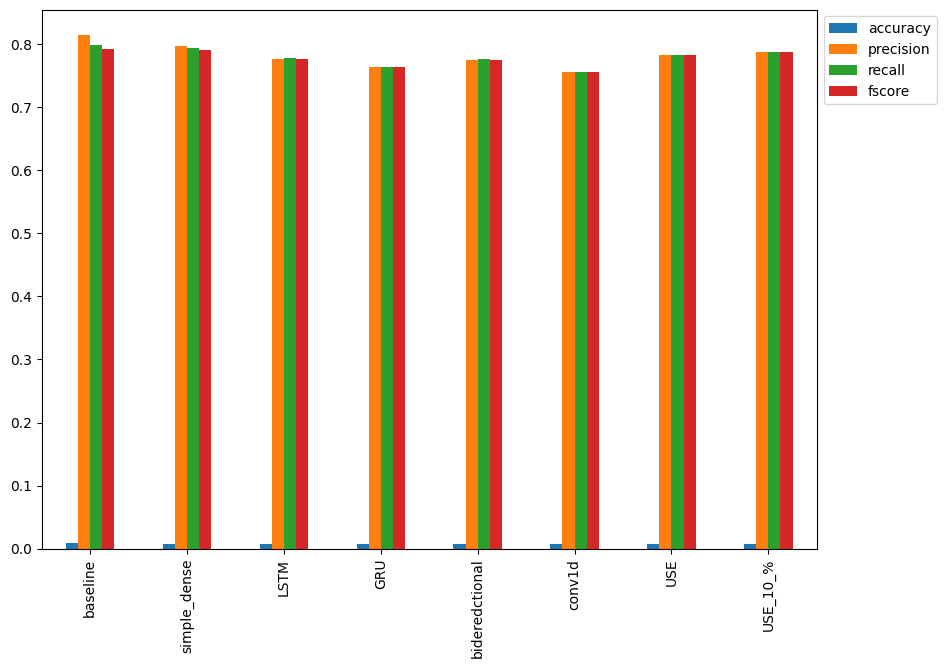

In [109]:
all_model_results.plot(kind="bar",figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0));

## viewing the tensorboard logs

In [111]:
! tensorboard dev upload --logdir ./model_logs/ \
  --name "NLP MODEL EXPERIMENTS" \
  --one_shot

2023-05-21 09:32:21.027861: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   KLF-HXH-TZK



New experiment created. View your TensorBoard at: https://tensorboard.dev/experi

In [113]:
model_6.save("model_6.h5")

In [116]:
import tensorflow_hub as hub
loaded_model_6=tf.keras.models.load_model("model_6.h5",
                                          custom_objects={"KerasLayer":hub.KerasLayer})

In [119]:
val_df=pd.DataFrame({"text":val_sentences,
                     "target":val_labels,
                     "pred":model_6_preds,
                     "pred_prob":tf.squeeze(model_6_pred_probs)})

In [120]:
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.390096
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.687300
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.828933
3,@camilacabello97 Internally and externally scr...,1,0.0,0.356079
4,Radiation emergency #preparedness starts with ...,1,1.0,0.652222


In [121]:
most_wrong=val_df[val_df["target"]!=val_df["pred"]].sort_values("pred_prob",ascending=False)

In [122]:
most_wrong

,text,target,pred,pred_prob
805,Fire hazard associated with installation of no...,0,1.0,0.803540
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.784408
881,@adorableappple No reported flooding po in the...,0,1.0,0.784090
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.741970
921,http://t.co/eHKLp12yiP Paci?c Media Centre | a...,0,1.0,0.731553
...,...,...,...,...
1069,@BradleyBrad47 yeah but being fast and doing e...,1,0.0,0.160670
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.144779
233,I get to smoke my shit in peace,1,0.0,0.136904
935,'I did another one I did another one. You stil...,1,0.0,0.110287
